# # Análise Exploratória

In [1]:
import librosa
import librosa.display

import numpy as np
import pandas as pd
import seaborn as sns
import IPython.display as ipd
import matplotlib.pyplot as plt

from random import choice

%matplotlib inline

In [2]:
DIR_DATAFRAMES = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES'
ARQUIVO_XFUSAO = f'{DIR_DATAFRAMES}/Xfusao.csv'

In [3]:
Xfusao = pd.read_csv(ARQUIVO_XFUSAO, sep=';')
Xfusao.shape

(1364, 8)

In [4]:
Xfusao.head()

path dataset        arquivo  \
0  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l1.wav   
1  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l2.wav   
2  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l3.wav   
3  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l4.wav   
4  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l5.wav   

  pessoa genero   emocao intensidade   duracao  
0     f1      f  alegria         NaN  2.451610  
1     f1      f  alegria         NaN  3.916553  
2     f1      f  alegria         NaN  3.482993  
3     f1      f  alegria         NaN  3.684354  
4     f1      f  alegria         NaN  2.343061

## Sinal
___

sinal.shape = (19687,), sr = 44100, duracao = 0.45s


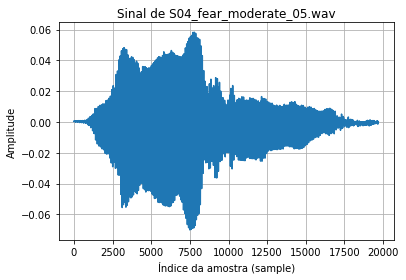

In [5]:
p = choice(Xfusao['path'])
f = p.split('/')[-1]

sinal, sr = librosa.load(p, sr=None)
duracao = librosa.get_duration(y=sinal, sr=sr)

print(f'sinal.shape = {sinal.shape}, sr = {sr}, duracao = {duracao:.2f}s')

plt.plot(sinal);
plt.title(f'Sinal de {f}');
plt.xlabel('Índice da amostra (sample)');
plt.ylabel('Amplitude');
plt.grid()
plt.show()

ipd.Audio(p)

## Energia
___

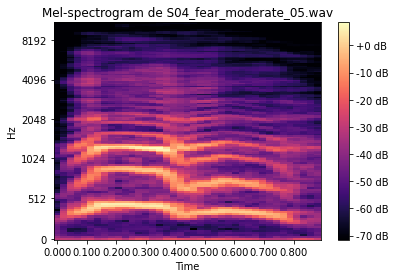

In [6]:
melspec = librosa.feature.melspectrogram(y=sinal, sr=sr)
melspec = librosa.power_to_db(melspec)

img = librosa.display.specshow(melspec, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

plt.title(f'Mel-spectrogram de {f}')

plt.show()

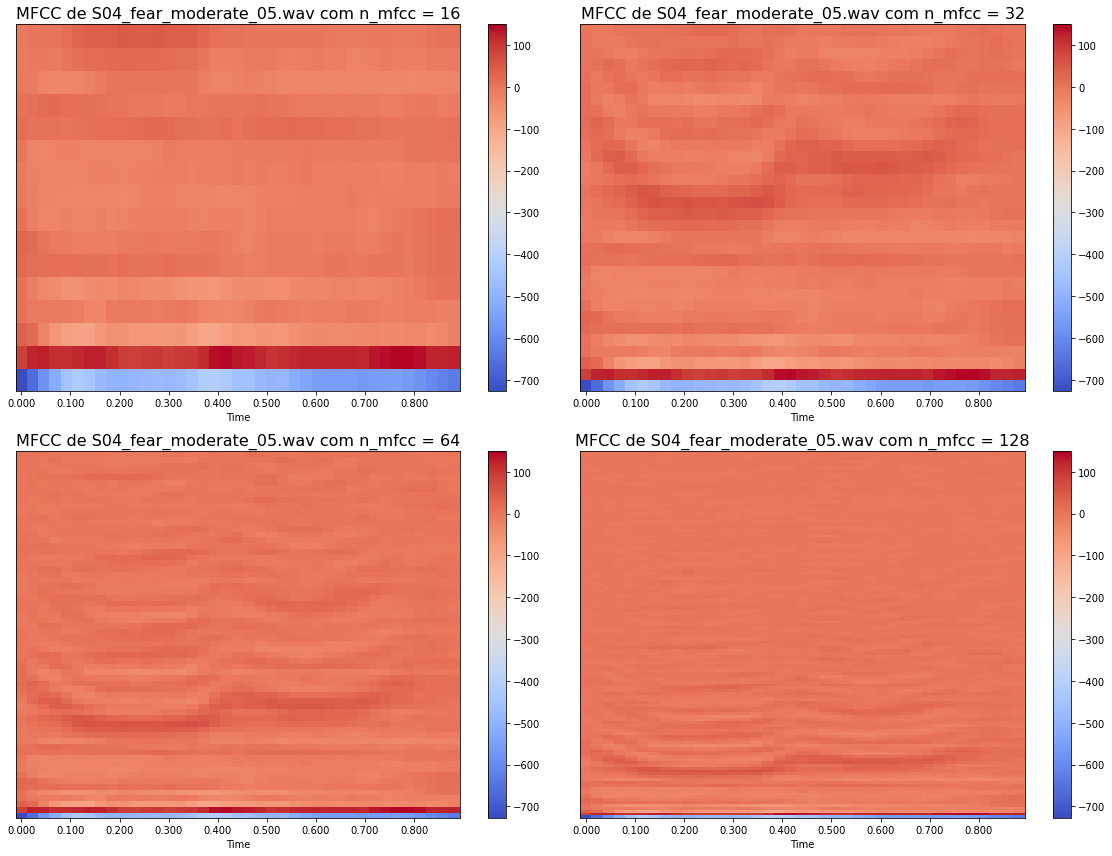

In [7]:
plt.figure(figsize=(16,12))

row, col, idx = 2, 2, 1

for n in (16, 32, 64, 128):
    plt.subplot(row, col, idx)
    melceps = librosa.feature.mfcc(y=sinal, sr=sr, n_mfcc=n)
    librosa.display.specshow(melceps, x_axis='time')
    plt.title(f'MFCC de {f} com n_mfcc = {n}', fontsize=16)
    plt.colorbar()
    idx += 1

plt.tight_layout()
plt.show()

## Sampling Rate
____

In [8]:
__ = [librosa.load(_, sr=None)[-1] for _ in Xfusao['path']]

In [9]:
print('Distruição da duração (s):')

pd.Series(data=__).describe()

Distruição da duração (s):


count     1364.000000
mean     43476.466276
std       5727.329199
min      16000.000000
25%      44100.000000
50%      44100.000000
75%      44100.000000
max      48000.000000
dtype: float64

In [10]:
_ = pd.Series(data=__).value_counts()
_

44100    1139
48000     171
16000      54
dtype: int64

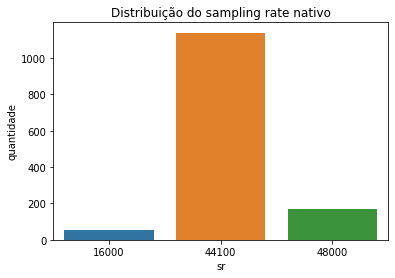

In [11]:
sns.barplot(x=_.index, y=_.values)
plt.xlabel('sr')
plt.ylabel('quantidade')
plt.title('Distribuição do sampling rate nativo')

plt.show()

Assim, a partir de agora iremos assumir $sr = 44100 Hz$ ($44.1kHz$) para carregar os arquivos

In [12]:
SAMPLING_RATE = 44100

## Duração
___

In [13]:
%%time

Xsinal = [librosa.load(_, sr=SAMPLING_RATE)[0] for _ in Xfusao['path']]
len(Xsinal)

CPU times: user 7.71 s, sys: 420 ms, total: 8.13 s
Wall time: 8.24 s


1364

In [14]:
f'{DIR_DATAFRAMES}/Xsinal.npy'

'/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES/Xsinal.npy'

In [15]:
np.save(f'{DIR_DATAFRAMES}/Xsinal.npy', np.array(Xsinal, dtype=object), allow_pickle=True)

In [16]:
Xfusao['dim sinal'] = [_.shape for _ in Xsinal]
Xfusao.head()

path dataset        arquivo  \
0  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l1.wav   
1  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l2.wav   
2  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l3.wav   
3  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l4.wav   
4  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...   verbo  ale-f1-l5.wav   

  pessoa genero   emocao intensidade   duracao  dim sinal  
0     f1      f  alegria         NaN  2.451610  (108116,)  
1     f1      f  alegria         NaN  3.916553  (172720,)  
2     f1      f  alegria         NaN  3.482993  (153600,)  
3     f1      f  alegria         NaN  3.684354  (162480,)  
4     f1      f  alegria         NaN  2.343061  (103329,)

In [17]:
print('Distribuição da dimensão do sinal:')

__ = [_[0] for _ in Xfusao['dim sinal']]

pd.Series(data=__).describe()

Distribuição da dimensão do sinal:


count      1364.000000
mean      71344.955279
std       41803.568942
min       17619.000000
25%       35013.750000
50%       65853.500000
75%       97156.250000
max      241533.000000
dtype: float64

In [18]:
MAX_LEN_SINAL = max(__)
MAX_LEN_SINAL

241533

In [19]:
Xfusao['ratio dim'] = [MAX_LEN_SINAL/_.shape[0] for _ in Xsinal]
Xfusao.tail()

path dataset  \
1359  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VIVAE/VIV...   vivae   
1360  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VIVAE/VIV...   vivae   
1361  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VIVAE/VIV...   vivae   
1362  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VIVAE/VIV...   vivae   
1363  /media/hbrandao/STORAGE_HDD_1TB/PPGI/VIVAE/VIV...   vivae   

                           arquivo pessoa genero    emocao intensidade  \
1359       S11_surprise_low_03.wav    S11    NaN  surpresa       fraca   
1360  S11_surprise_moderate_01.wav    S11    NaN  surpresa    moderada   
1361      S11_surprise_peak_04.wav    S11    NaN  surpresa        pico   
1362   S11_surprise_strong_011.wav    S11    NaN  surpresa       forte   
1363   S11_surprise_strong_012.wav    S11    NaN  surpresa       forte   

       duracao dim sinal  ratio dim  
1359  1.335941  (58915,)   4.099686  
1360  0.745760  (32888,)   7.344107  
1361  1.999705  (88187,)   2.738873  
1362  0.779864  (34392,)   7.022941  
1363  1.413061  (62316,)   3.875939

## \# -------------------- Zero padding

In [20]:
ex123, *_ = librosa.load(Xfusao.iloc[123]['path'], sr=SAMPLING_RATE)
ex999, *_ = librosa.load(Xfusao.iloc[999]['path'], sr=SAMPLING_RATE)

ex123.shape, ex999.shape

((76813,), (22764,))

In [21]:
ipd.Audio(data=ex123, rate=SAMPLING_RATE)

In [22]:
ex123_fixlen = librosa.util.fix_length(data=ex123, size=MAX_LEN_SINAL)
print(ex123_fixlen.shape)

ipd.Audio(data=ex123_fixlen, rate=SAMPLING_RATE)

(241533,)


In [23]:
ipd.Audio(data=ex999, rate=SAMPLING_RATE)

In [24]:
ex999_fixlen = librosa.util.fix_length(data=ex999, size=MAX_LEN_SINAL)
print(ex999_fixlen.shape)

ipd.Audio(data=ex999_fixlen, rate=SAMPLING_RATE)

(241533,)


In [25]:
print(f'{ex123.shape} -> {ex123_fixlen.shape}\n{ex999.shape} -> {ex999_fixlen.shape}')

(76813,) -> (241533,)
(22764,) -> (241533,)


In [26]:
Xsinal_0padded = np.array([
    librosa.util.fix_length(data=_, size=MAX_LEN_SINAL) for _ in Xsinal
])
Xsinal_0padded.shape

(1364, 241533)

In [27]:
f'{DIR_DATAFRAMES}/Xsinal_0padded.npy'

'/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES/Xsinal_0padded.npy'

In [28]:
np.save(f'{DIR_DATAFRAMES}/Xsinal_0padded.npy', Xsinal_0padded)

## \# -------------------- Stretch

In [29]:
ipd.Audio(data=ex123, rate=SAMPLING_RATE)

In [30]:
ex123_stretch = np.repeat(a=ex123, repeats=int(MAX_LEN_SINAL/ex123.shape[0]), axis=0)
print(ex123_stretch.shape)

ipd.Audio(data=ex123_stretch, rate=SAMPLING_RATE)

(230439,)


In [31]:
Xsinal_stretch = [
    np.repeat(a=_, repeats=int(MAX_LEN_SINAL/_.shape[0]), axis=0) for _ in Xsinal
]
len(Xsinal_stretch)

1364

### Stretch - Zero padded

In [32]:
ex123_stretch_0padded = librosa.util.fix_length(data=ex123_stretch, size=MAX_LEN_SINAL)
ex123_stretch_0padded.shape

(241533,)

In [33]:
ipd.Audio(data=ex123_stretch_0padded, rate=SAMPLING_RATE)

In [34]:
Xsinal_stretch_0padded = np.array([
    librosa.util.fix_length(data=_, size=MAX_LEN_SINAL) for _ in Xsinal_stretch
])
Xsinal_stretch_0padded.shape

(1364, 241533)

In [35]:
f'{DIR_DATAFRAMES}/Xsinal_stretch_0padded.npy'

'/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES/Xsinal_stretch_0padded.npy'

In [36]:
np.save(f'{DIR_DATAFRAMES}/Xsinal_stretch_0padded.npy', Xsinal_stretch_0padded)

## \# -------------------- Tile

In [37]:
ex123_tile = np.tile(A=ex123, reps=int(MAX_LEN_SINAL/ex123.shape[0]))
print(ex123_tile.shape)

ipd.Audio(data=ex123_tile, rate=SAMPLING_RATE)

(230439,)


In [38]:
ex999_tile = np.tile(A=ex999, reps=int(MAX_LEN_SINAL/ex999.shape[0]))
print(ex999_tile.shape)

ipd.Audio(data=ex999_tile, rate=SAMPLING_RATE)

(227640,)


In [39]:
Xsinal_tile = [np.tile(A=_, reps=int(MAX_LEN_SINAL/_.shape[0])) for _ in Xsinal]
len(Xsinal_tile)

1364

### Tile - Zero Padded

In [40]:
ex123_tile_0padded = librosa.util.fix_length(data=ex123_tile, size=MAX_LEN_SINAL)

ipd.Audio(data=ex123_tile_0padded, rate=SAMPLING_RATE)

In [41]:
Xsinal_tile_0padded = np.array(
    [librosa.util.fix_length(data=_, size=MAX_LEN_SINAL) for _ in Xsinal_tile]
)
Xsinal_tile_0padded.shape

(1364, 241533)

In [42]:
f'{DIR_DATAFRAMES}/Xsinal_tile_0padded.npy'

'/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES/Xsinal_tile_0padded.npy'

In [43]:
np.save(f'{DIR_DATAFRAMES}/Xsinal_tile_0padded.npy', Xsinal_tile_0padded)

In [44]:
!ls -lah $DIR_DATAFRAMES/

total 4,1G
drwxrwxrwx 1 hbrandao hbrandao 4,0K mar 21 23:15 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 21 23:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 181K mar 21 23:27 Xfusao.csv
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 372M mar 23 00:32 Xsinal.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_stretch_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_tile_0padded.npy


## Data Frames
___

In [45]:
!ls -lah $DIR_DATAFRAMES

total 4,1G
drwxrwxrwx 1 hbrandao hbrandao 4,0K mar 21 23:15 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 21 23:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 181K mar 21 23:27 Xfusao.csv
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 372M mar 23 00:32 Xsinal.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_stretch_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_tile_0padded.npy
